In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## precision@k, recall@k -- pg23

In [93]:
a = pd.Series([False] + [True] * 5 + [False] * 4)
b = pd.Series([True] * 3 + [False] * 5 + [True] * 2)

a.sum(), b.sum()


(5, 5)

ValueError: Other Series must have a name

In [115]:
a_df = (a.cumsum()/5).to_frame("recall").join((a.cumsum()/(a.index + 1)).to_frame("precision"))
b_df = (b.cumsum()/5).to_frame("recall").join((b.cumsum()/(b.index + 1)).to_frame("precision"))


a_df, b_df


(   recall  precision
 0     0.0   0.000000
 1     0.2   0.500000
 2     0.4   0.666667
 3     0.6   0.750000
 4     0.8   0.800000
 5     1.0   0.833333
 6     1.0   0.714286
 7     1.0   0.625000
 8     1.0   0.555556
 9     1.0   0.500000,
    recall  precision
 0     0.2   1.000000
 1     0.4   1.000000
 2     0.6   1.000000
 3     0.6   0.750000
 4     0.6   0.600000
 5     0.6   0.500000
 6     0.6   0.428571
 7     0.6   0.375000
 8     0.8   0.444444
 9     1.0   0.500000)

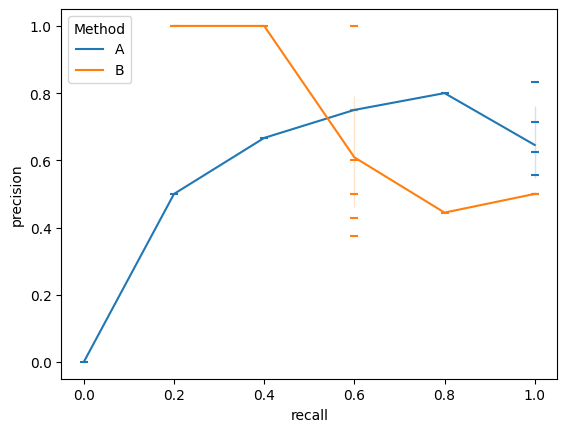

In [141]:
plt.scatter(a_df["recall"], a_df["precision"], marker="_")
sns.lineplot(a_df, x="recall", y="precision", label="A")
plt.scatter(b_df["recall"], b_df["precision"], marker="_")
sns.lineplot(b_df, x="recall", y="precision", label="B")
plt.legend(title="Method")




## ap -- pg 27

In [150]:
ap_a = a_df["precision"].loc[a].sum() / 5
ap_b = b_df["precision"].loc[b].sum() / 5
round(ap_a, 6), round(ap_b, 6)


(0.71, 0.788889)

## ndcg -- pg 40

In [177]:
import numpy as np
bug_a = np.array([1, 3, 3, 3, 3, 1, 3, 1, 1, 1])
bug_b = np.array([3, 3, 3, 1, 1, 1, 1, 3, 3, 1])
bug_ideal = np.array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1])
rank_discount = np.log2(np.arange(1, 11) + 1)

dcg_a = np.cumsum(np.divide(bug_a, rank_discount))
dcg_b = np.cumsum(np.divide(bug_b, rank_discount))
dcg_ideal = np.cumsum(np.divide(bug_ideal, rank_discount))

np.divide(dcg_a, dcg_ideal)[4], np.divide(dcg_b, dcg_ideal)[4]


(0.7738931964842558, 0.8151510484299677)